In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [23]:
# write your code for task 0 here

pd_adult = pd.read_csv("../data/adult.csv")
pd_adult_cleaned = pd_adult[~pd_adult.isin(["?"]).any(axis=1)]
print(pd_adult_cleaned["salary K$"].unique())
print(pd_adult_cleaned["salary"].unique())

expected_salary_values = [">50K", "<=50K"]
unexpected_salaries = pd_adult_cleaned[~pd_adult_cleaned["salary"].isin(expected_salary_values)]

print(unexpected_salaries)
print(pd_adult_cleaned["salary K$"].apply(lambda x: isinstance(x, (int, float))).all())

mismatch = pd_adult_cleaned[
    ((pd_adult_cleaned["salary"] == "<=50K") & (pd_adult_cleaned["salary K$"] > 50)) |
    ((pd_adult_cleaned["salary"] == ">50K") & (pd_adult_cleaned["salary K$"] <= 50))
]

print("Rows with mismatched salary and salary K$:")
print(mismatch)


[ 39  35  27  43  25  44  49 307 330 303 116 279  28  15  42  31 151 265
  36 117  21  16  37  18  30  40  41  17  47 268  34  26 254 332 341  38
  33  19 248  32 225 194 301  24  45  22 278 233  48  86 166 284 217 120
  99 323 197  23  46 250 274 244 346 171 215  20 140 106 266 231 242 176
 339  29 125 143  70  53 239  73 160 329 247 145 148 316 124 199 296 112
 177  85  83 331 286 180 214 169 256 185 115 163 276  82 321 261 181 167
 210  79 337 328  74 183 314 334  87 320 347  89  55  52 348 146 251 174
 234 338 227 113 282 269 344 184 141 158  91 263 319 285 216 155 179 122
  97 202 153 161 236 144 182 102  67 297 230 342  58 188 298 100 108 260
 118  95 134 240 300  59 313  98 223 271 150 295 280 309 209 101 224 281
 222 187  63  66 130 105 270 294 189 259 129 349 275 147 340 133 200 235
  57 237 107 103 253 293 198 119 206 175 207 127 232 111 186 110  90 126
 211  84 168  60 192 203 212 137 132 272  96 228 208 138 172 302 218 315
 191 277 149 238 162 308 128 304 121  51 336 326 24

# Task 1
Print the count of men and women in the dataset.

In [39]:
# write your code for task 1 here
print(pd_adult_cleaned["sex"].value_counts())


Male      20380
Female     9782
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [37]:
# write your code for task 2 here
pd_adult_cleaned[pd_adult_cleaned["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [40]:
# write your code for task 3 here
(pd_adult_cleaned["native-country"] == "Poland").mean() * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [42]:
# write your code for task 4 here

#  >50K
high_earners = pd_adult_cleaned[pd_adult_cleaned["salary"] == ">50K"]
mean_high = high_earners["age"].mean()
std_high = high_earners["age"].std()

# <=50K
low_earners = pd_adult_cleaned[pd_adult_cleaned["salary"] == "<=50K"]
mean_low = low_earners["age"].mean()
std_low = low_earners["age"].std()

print(f"Mean age for >50K: {mean_high:.2f}, Std Dev: {std_high:.2f}")
print(f"Mean age for <=50K: {mean_low:.2f}, Std Dev: {std_low:.2f}")



Mean age for >50K: 43.96, Std Dev: 10.27
Mean age for <=50K: 36.61, Std Dev: 13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [31]:
# write your code for task 5 here

higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

no_higher_education = pd_adult_cleaned[~pd_adult_cleaned["education"].isin(higher_education)]

high_salary_no_education = no_higher_education[no_higher_education["salary"] == ">50K"]

count_high_salary_no_education = len(high_salary_no_education)

print(f"Number of people without higher education earning >50K: {count_high_salary_no_education}")

Number of people without higher education earning >50K: 3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [43]:
# write your code for task 6 here

pd_adult_cleaned.groupby("education")["age"].describe()


,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [33]:
# write your code for task 7 here
men = pd_adult_cleaned[pd_adult_cleaned["sex"] == "Male"]

married_men = men[men["marital-status"].str.startswith("Married")]

single_men = men[~men["marital-status"].str.startswith("Married")]

married_high_salary = married_men[married_men["salary"] == ">50K"].shape[0]
married_low_salary = married_men[married_men["salary"] == "<=50K"].shape[0]

single_high_salary = single_men[single_men["salary"] == ">50K"].shape[0]
single_low_salary = single_men[single_men["salary"] == "<=50K"].shape[0]

print(f"Married men earning >50K: {married_high_salary}")
print(f"Married men earning <=50K: {married_low_salary}")
print(f"Non-married men earning >50K: {single_high_salary}")
print(f"Non-married men earning <=50K: {single_low_salary}")

if married_high_salary > single_high_salary:
    print("Married men earn more than single men (>50K).")
else:
    print("Non-married men earn more than married men (>50K).")


Married men earning >50K: 5723
Married men earning <=50K: 7052
Non-married men earning >50K: 673
Non-married men earning <=50K: 6932
Married men earn more than single men (>50K).


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [34]:
# write your code for task 8 here

max_hours = pd_adult_cleaned["hours-per-week"].max()

people_with_max_hours = pd_adult_cleaned[pd_adult_cleaned["hours-per-week"] == max_hours].shape[0]

print(f"Max hours per week: {max_hours}")
print(f"Number of people working {max_hours} hours per week: {people_with_max_hours}")

Max hours per week: 99
Number of people working 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

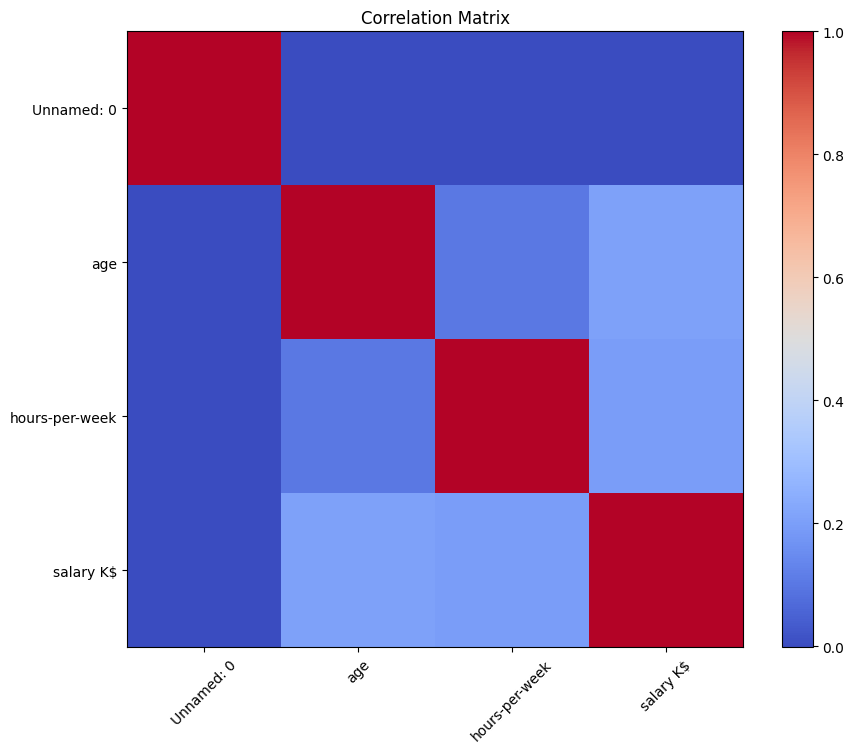

In [36]:
# write your code for task 9 here

correlation_matrix = pd_adult_cleaned.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix")

plt.show()